In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_raw = pd.read_csv('amazon_cells_labelled.txt',  delimiter='\t', header = None)
data_raw.columns = ['message', 'score']
data_raw.head()

,message,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


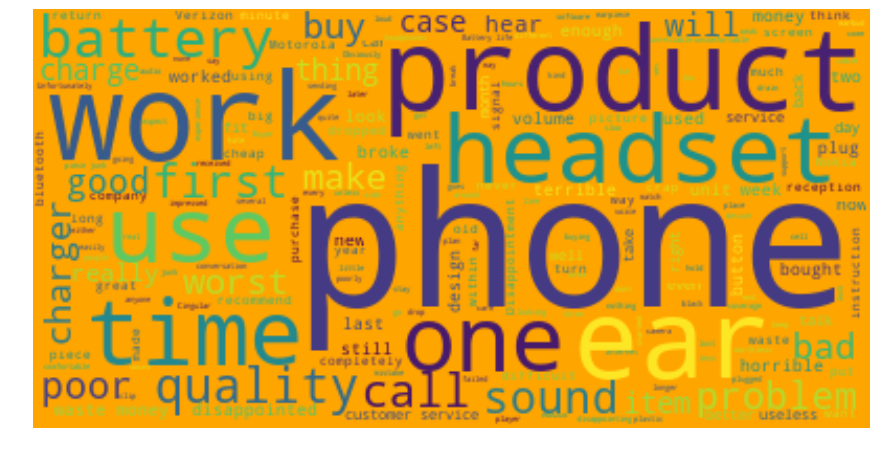

In [28]:
from wordcloud import WordCloud

data_zeros = data_raw[data_raw['score'] == 0]

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(data_zeros["message"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

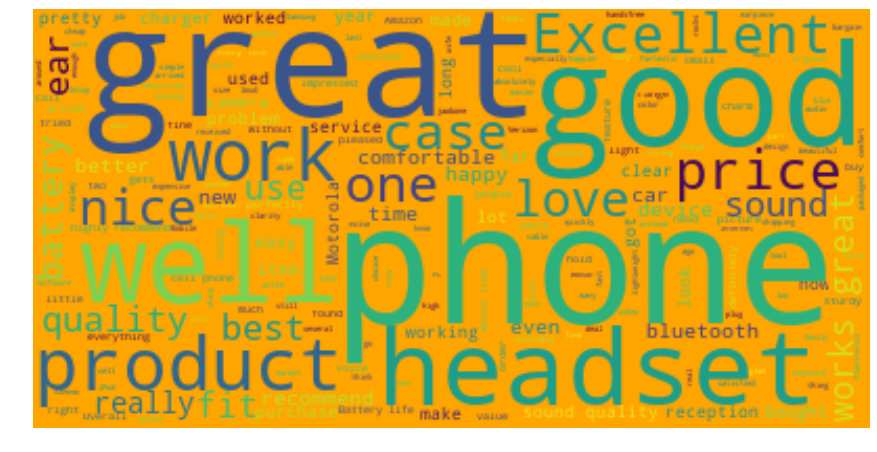

In [40]:
from wordcloud import WordCloud

data_ones = data_raw[data_raw['score'] == 1]

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(data_ones["message"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [37]:
keywords = ['poor', 'problem', 'bad', 'worst', 'waste', 'disappointed', 'horrible', 'terrible', 'last', 'crap', 'never', ] 
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data_raw[str(key)] = data_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [41]:
data_raw.head()

,message,score,poor,problem,bad,worst,waste,disappointed,horrible,terrible,last
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False


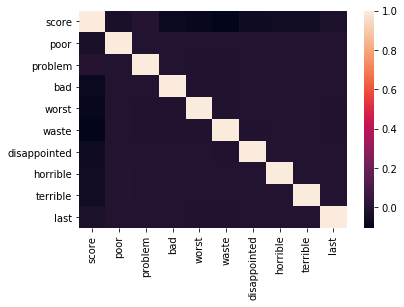

In [42]:
sns.heatmap(data_raw.corr())

In [43]:
data = data_raw[keywords]
target = data_raw['score']

In [44]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 463


## IMDB Data

In [52]:
#imdb_labelled.txt
imdb_raw = pd.read_csv('imdb_labelled.txt',  delimiter='\t', header = None)
imdb_raw.columns = ['message', 'score']
imdb_raw.head()

,message,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [53]:
keywords = ['poor', 'problem', 'bad', 'worst', 'waste', 'disappointed', 'horrible', 'terrible', 'last', 'never', ] 
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb_raw[str(key)] = imdb_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [54]:
imdb_raw.head()

,message,score,poor,problem,bad,worst,waste,disappointed,horrible,terrible,last,never
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,True,False,False,False,False,True,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,False,False,False,False


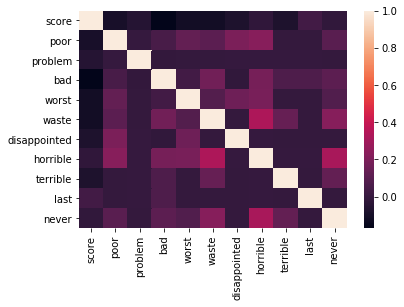

In [55]:
sns.heatmap(imdb_raw.corr())

In [56]:
imdb_data = imdb_raw[keywords]
target = imdb_raw['score']

In [57]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(imdb_data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(imdb_data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    imdb_data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 307


## Yelp Data

In [59]:
#yelp_labelled.txt
yelp_raw = pd.read_csv('yelp_labelled.txt',  delimiter='\t', header = None)
yelp_raw.columns = ['message', 'score']
yelp_raw.head()

,message,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [62]:
keywords = ['poor', 'problem', 'bad', 'worst', 'waste', 'disappointed', 'horrible', 'terrible', 'last', 'never', 'crap' ] 
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [63]:
yelp_raw.head()

,message,score,poor,problem,bad,worst,waste,disappointed,horrible,terrible,last,never,crap
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,False,False,False


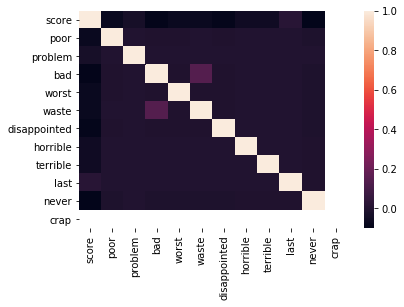

In [64]:
sns.heatmap(yelp_raw.corr())

In [65]:
yelp_data = yelp_raw[keywords]
target = yelp_raw['score']

In [68]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(yelp_data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(yelp_data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    yelp_data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 446
